## Questões:
1. Qual plataforma possui mais títulos incluídos ao catálogo ?
2. Após a visualização do número de títulos em cada plataforma, desejo saber quantos filmes e séries presentes na Netflix estão também vinculados à outras plataformas de streaming, e assim por diante.
3. Rankear pela nota do IMDb, retirando os dados ausentes da coluna, qual plataforma é melhor para o cliente assinar.

### Importação de bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura de Arquivos

In [2]:
df_dados = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df_dados.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Descarte de colunas e Reindexação

In [3]:
#Apagar colunas que são desnecessárias utilizando a função .drop():
df_dados.drop(['Unnamed: 0','ID','Type'], axis = 1, inplace=True)
df_dados.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Análise de valores faltantes

In [4]:
#Verificar possíveis dados faltantes
df_dados.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

- Em motivo de aprendizado maior, irei trabalhar com indexação entre minhas colunas úteis;
- Decidir fazer isso por motivo de tentar entender o método, não necessariamente atrapalharia ou melhoraria o levantamento de respostas das minhas hipóteses

In [5]:
nome_colunas = ['Title','Year','Age','IMDb','Rotten Tomatoes','Netflix','Hulu','Prime Video','Disney+',
                 'Directors','Genres','Country','Language','Runtime']

In [6]:
#Criei uma lista com o nome das colunas de meu DataFrame, porém, em ordem que eu me sinta confortável
df_dados = df_dados.reindex(columns=nome_colunas)

### Seleção com loc e iloc
- Para selecionar subconjuntos de linhas e colunas do meu DataFrame, utilizarei .loc e .iloc, na qual são reconhecidas pelos rótulos de eixo(**.loc**) e inteiro(**.iloc**).

- Para entendermos a estrutura de seleção loc, vamos selecionar as 15 primeiras linhas e pedir apenas as colunas de título e diretors:


In [7]:
df_dados.loc[0:15, ['Title','Directors']]

,Title,Directors
0,Inception,Christopher Nolan
1,The Matrix,"Lana Wachowski,Lilly Wachowski"
2,Avengers: Infinity War,"Anthony Russo,Joe Russo"
3,Back to the Future,Robert Zemeckis
4,"The Good, the Bad and the Ugly",Sergio Leone
5,Spider-Man: Into the Spider-Verse,"Bob Persichetti,Peter Ramsey,Rodney Rothman"
6,The Pianist,Roman Polanski
7,Django Unchained,Quentin Tarantino
8,Raiders of the Lost Ark,Steven Spielberg
9,Inglourious Basterds,Quentin Tarantino


###  Qual plataforma possui mais títulos incluídos ao catálogo:

In [8]:
#Filmes vinculados à Netflix
netflix_data = df_dados.loc[df_dados['Netflix'] == 1]

In [9]:
#Filmes vinculados à Hulu
hulu_data = df_dados.loc[df_dados['Hulu'] ==1]

In [10]:
#Filmes vinculados à Prime Video
prime_data = df_dados.loc[df_dados['Prime Video'] ==1]

In [11]:
#Filmes vinculados à Disney+
disney_data = df_dados.loc[df_dados['Disney+'] ==1]

### Criação de listas para armazenar o número de títulos pertecentes a cada plataforma de stream:

In [12]:
# Eu poderia criar uma variável para cada filtro, mas decidir visualizar as listas durante o processo
numero_titulos = [netflix_data['Title'].count(), hulu_data['Title'].count(),
                   prime_data['Title'].count() , disney_data['Title'].count()]

# Lista de nomes de cada plataforma:
nomes_plataformas = ['Netflix','Hulu','Prime Video','Disney+']

### Criação de gráfico de barras para comparação:

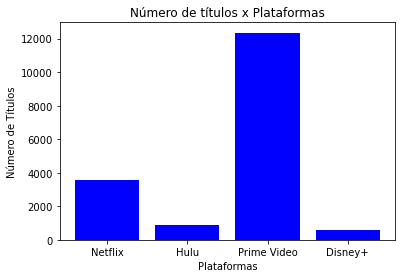

In [13]:
#Construção de plotagem do gráfico de barras:
plt.bar(nomes_plataformas, numero_titulos, color='Blue')

#Título do gráfico
plt.title('Número de títulos x Plataformas')

#A label para o eixo Y:
plt.ylabel('Número de Títulos')

#A label para o eixo X:
plt.xlabel('Plataformas')

plt.show()

- A partir do gráfico acima, podemos observar que a plataforma que mais possui títulos é a Amazom Prime Video, com cerca de mais de 12.000 títulos na plataforma

###  Após a visualização do número de títulos em cada plataforma, desejo saber quantos filmes e séries presentes na Netflix estão também vinculados à outras plataformas de streaming, e assim por diante:

In [14]:
netflix_data[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix        3560
Hulu             25
Prime Video     345
Disney+          10
dtype: int64

##### Na plataforma da Netflix, dos 3560 títulos, podemos perceber que :
1. 25 títulos presentes na Hulu
2. 345 títulos presentes na Prime Video
3. 10 títulos presentes na Disney+

In [15]:
hulu_data[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix         25
Hulu           903
Prime Video    241
Disney+          7
dtype: int64

##### Na plataforma da Hulu, dos 903 títulos, podemos perceber que :
1. 25 títulos presentes na Netflix
2. 241 títulos presentes na Prime Video
3. 7 títulos presentes na Disney+

In [16]:
prime_data[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix          345
Hulu             241
Prime Video    12354
Disney+           19
dtype: int64

#### Na plataforma da Prime Video, dos 12354 títulos, podemos perceber que:
1. 345 títulos presentes na Netflix
2. 241 títulos presentes na Hulu
3. 19 títulos presentes na Disney+

In [17]:
disney_data[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix         10
Hulu             7
Prime Video     19
Disney+        564
dtype: int64

#### Na plataforma da Disney+, dos 564 títulos, podemos perceber que:
1. 10 títulos presentes na Netflix
2. 7 títulos presentes na Hulu
3. 19 títulos presentes na Prime Video

### Rankear pela nota do IMDb, retirando os dados ausentes da coluna, qual plataforma é melhor para o cliente assinar:

In [18]:
print("Média de nota do IMDb dos títulos presentes na Netflix : {:.2f}".format(netflix_data['IMDb'].dropna().mean()))

print("Média de nota do IMDb dos títulos presentes na Disney+ : {:.2f}".format(disney_data['IMDb'].dropna().mean()))

print("Média de nota do IMDb dos títulos presentes na Hulu : {:.2f}".format(hulu_data['IMDb'].dropna().mean()))

print("Média de nota do IMDb dos títulos presentes na Prime Video : {:.2f}".format(prime_data['IMDb'].dropna().mean()))

Média de nota do IMDb dos títulos presentes na Netflix :     6.25
Média de nota do IMDb dos títulos presentes na Disney+ :     6.44
Média de nota do IMDb dos títulos presentes na Hulu :        6.14
Média de nota do IMDb dos títulos presentes na Prime Video : 5.77


### Análise de gêneros de títulos

In [27]:
netflix_data['Genres'].str.contains('Drama').dropna().sum()

1501

In [19]:
print("Número de títulos relacionados ao gênero de drama na Netflix :     {}".format(netflix_data['Genres'].str.contains('Drama').dropna().sum()))
print("Número de títulos relacionados ao gênero de drama na Hulu :        {}".format(hulu_data['Genres'].str.contains('Drama').dropna().sum()))
print("Número de títulos relacionados ao gênero de drama na Disney+ :     {}".format(disney_data['Genres'].str.contains('Drama').dropna().sum()))
print("Número de títulos relacionados ao gênero de drama na Prime Video : {}".format(prime_data['Genres'].str.contains('Drama').dropna().sum()))

Número de títulos relacionados ao gênero de drama na Netflix :     1501
Número de títulos relacionados ao gênero de drama na Hulu :        438
Número de títulos relacionados ao gênero de drama na Disney+ :     162
Número de títulos relacionados ao gênero de drama na Prime Video : 5437


In [20]:
print("Número de títulos relacionados ao gênero de ação na Netflix :     {}"
      .format(netflix_data['Genres'].str.contains('Action').dropna().sum()))
print("Número de títulos relacionados ao gênero de ação na Hulu :        {}"
      .format(hulu_data['Genres'].str.contains('Action').dropna().sum()))
print("Número de títulos relacionados ao gênero de ação na Disney+ :     {}"
      .format(disney_data['Genres'].str.contains('Action').dropna().sum()))
print("Número de títulos relacionados ao gênero de ação na Prime Video : {}"
      .format(prime_data['Genres'].str.contains('Action').dropna().sum()))

Número de títulos relacionados ao gênero de ação na Netflix :     545
Número de títulos relacionados ao gênero de ação na Hulu :        129
Número de títulos relacionados ao gênero de ação na Disney+ :     88
Número de títulos relacionados ao gênero de ação na Prime Video : 2049
